In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os
import geopandas as gpd
import geoplot

In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv(r'C:\Users\Lore\12.2020ProiectCursDA\6 Covid Economies\df.csv', index_col = False)

In [4]:
path = r'C:\Users\Lore\12.2020ProiectCursDA'

In [5]:
path

'C:\\Users\\Lore\\12.2020ProiectCursDA'

In [6]:
df.head()

,Unnamed: 0,CODE,COUNTRY,CITY,CONTINENT,EU,DATE,HDI,TC,TD,STI,Population,GDPCAP
0,0,AFG,Afghanistan,Kabul,Asia,No,12/31/2019,0.498,0.0,0.0,0.0,17.477233,7.497754
1,1,AFG,Afghanistan,Kabul,Asia,No,1/1/2020,0.498,0.0,0.0,0.0,17.477233,7.497754
2,2,AFG,Afghanistan,Kabul,Asia,No,1/2/2020,0.498,0.0,0.0,0.0,17.477233,7.497754
3,3,AFG,Afghanistan,Kabul,Asia,No,1/3/2020,0.498,0.0,0.0,0.0,17.477233,7.497754
4,4,AFG,Afghanistan,Kabul,Asia,No,1/4/2020,0.498,0.0,0.0,0.0,17.477233,7.497754


In [7]:
#Q4
# Import ".shp" file: world countries
world = gpd.read_file(os.path.join(path, '6 Covid Economies', 'World_Countries.shp'))

In [8]:
world.head()

,COUNTRY,geometry
0,Aruba (Netherlands),"POLYGON ((-69.88223 12.41111, -69.94695 12.436..."
1,Antigua and Barbuda,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ..."
2,Afghanistan,"POLYGON ((61.27656 35.60725, 61.29638 35.62853..."
3,Algeria,"POLYGON ((-5.15213 30.18047, -5.13917 30.19236..."
4,Azerbaijan,"MULTIPOLYGON (((46.54037 38.87559, 46.49554 38..."


In [9]:
world.shape

(252, 2)

In [10]:
df.drop(["Unnamed: 0"], axis=1, inplace = True)

In [11]:
df.head()

,CODE,COUNTRY,CITY,CONTINENT,EU,DATE,HDI,TC,TD,STI,Population,GDPCAP
0,AFG,Afghanistan,Kabul,Asia,No,12/31/2019,0.498,0.0,0.0,0.0,17.477233,7.497754
1,AFG,Afghanistan,Kabul,Asia,No,1/1/2020,0.498,0.0,0.0,0.0,17.477233,7.497754
2,AFG,Afghanistan,Kabul,Asia,No,1/2/2020,0.498,0.0,0.0,0.0,17.477233,7.497754
3,AFG,Afghanistan,Kabul,Asia,No,1/3/2020,0.498,0.0,0.0,0.0,17.477233,7.497754
4,AFG,Afghanistan,Kabul,Asia,No,1/4/2020,0.498,0.0,0.0,0.0,17.477233,7.497754


In [12]:
#Q6
world_merge = world.merge(df, on = 'COUNTRY', how = 'outer', indicator = True)

In [14]:
world_merge["_merge"].value_counts()

both          43748
right_only     6243
left_only        74
Name: _merge, dtype: int64

In [15]:
#world_merge_2 = world_merge.dropna()
world_merge_2 = world_merge[world_merge["_merge"] == "both"]

In [17]:
world_merge_2["_merge"].value_counts()

both          43748
left_only         0
right_only        0
Name: _merge, dtype: int64

In [18]:
world_merge_2.tail()

,COUNTRY,geometry,CODE,CITY,CONTINENT,EU,DATE,HDI,TC,TD,STI,Population,GDPCAP,_merge
43814,Indonesia,"MULTIPOLYGON (((123.21846 -10.80917, 123.19832...",IDN,Jakarta,Asia,No,10/15/2020,0.694,12.750572,9.405578,0.0,19.426899,9.322664,both
43815,Indonesia,"MULTIPOLYGON (((123.21846 -10.80917, 123.19832...",IDN,Jakarta,Asia,No,10/16/2020,0.694,12.763286,9.414750,0.0,19.426899,9.322664,both
43816,Indonesia,"MULTIPOLYGON (((123.21846 -10.80917, 123.19832...",IDN,Jakarta,Asia,No,10/17/2020,0.694,12.775528,9.421168,0.0,19.426899,9.322664,both
43817,Indonesia,"MULTIPOLYGON (((123.21846 -10.80917, 123.19832...",IDN,Jakarta,Asia,No,10/18/2020,0.694,12.787623,9.427949,0.0,19.426899,9.322664,both
43818,Indonesia,"MULTIPOLYGON (((123.21846 -10.80917, 123.19832...",IDN,Jakarta,Asia,No,10/19/2020,0.694,12.799032,9.434364,0.0,19.426899,9.322664,both


In [19]:
#set(list(df["COUNTRY"].unique())) - set(list(world["COUNTRY"].unique())) 

In [17]:
#Q5
state_rec = pd.get_dummies(df['COUNTRY'])

In [18]:
state_rec.head()

,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,Aruba,...,United States,United States Virgin Islands,Uruguay,Uzbekistan,Vatican,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
#Q7
# Check for missing values.
world_merge_2.isnull().sum()

COUNTRY       0
geometry      0
CODE          0
CITY          0
CONTINENT     0
EU            0
DATE          0
HDI           0
TC            0
TD            0
STI           0
Population    0
GDPCAP        0
_merge        0
dtype: int64

No missing values.

In [23]:
#Check for duplicates
dups = world_merge_2[world_merge_2.duplicated()]

In [24]:
dups.shape

(0, 14)

No duplicates.

C:\Users\Lore\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TD', ylabel='Density'>

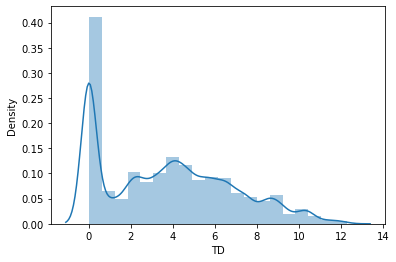

In [25]:
# Shows extreme values
sns.distplot(world_merge_2['TD'], bins=20)

In [24]:
# Check how many extreme values.
world_merge_2[world_merge_2['TD'] >20]

,COUNTRY,geometry,CODE,CITY,CONTINENT,EU,DATE,HDI,TC,TD,STI,Population,GDPCAP,_merge


In [35]:
import warnings
warnings.filterwarnings("ignore")

In [45]:
#sns.distplot(world_merge_2['TD'], bins = 20)
world_merge_2.loc[world_merge_2['TD'] == 0, "TD_new"] = 0
world_merge_2.loc[(world_merge_2['TD'] > 0) & (world_merge_2['TD'] <= 2), "TD_new"] = 1
world_merge_2.loc[(world_merge_2['TD'] > 2) & (world_merge_2['TD'] <=3), "TD_new"] = 2
world_merge_2.loc[(world_merge_2['TD'] > 3) & (world_merge_2['TD'] <=4), "TD_new"] = 3
world_merge_2.loc[(world_merge_2['TD'] > 4) & (world_merge_2['TD'] <=5), "TD_new"] = 4
world_merge_2.loc[(world_merge_2['TD'] > 5) & (world_merge_2['TD'] <=6), "TD_new"] = 5
world_merge_2.loc[(world_merge_2['TD'] > 6) & (world_merge_2['TD'] <=7), "TD_new"] = 6
world_merge_2.loc[(world_merge_2['TD'] > 7) & (world_merge_2['TD'] <=8), "TD_new"] = 7
world_merge_2.loc[(world_merge_2['TD'] > 8) & (world_merge_2['TD'] <=9), "TD_new"] = 8
world_merge_2.loc[(world_merge_2['TD'] > 9) & (world_merge_2['TD'] <=10), "TD_new"] = 9
world_merge_2.loc[(world_merge_2['TD'] > 10) & (world_merge_2['TD'] < 11), "TD_new"] = 10
world_merge_2.loc[(world_merge_2['TD'] > 11) & (world_merge_2['TD'] < 13), "TD_new"] = 11

In [47]:
world_merge_2['TD_new'].value_counts()

0.0     11076
4.0      5196
3.0      4844
5.0      4026
2.0      3897
1.0      3834
6.0      3699
7.0      2370
8.0      2082
9.0      1270
10.0     1059
11.0      395
Name: TD_new, dtype: int64

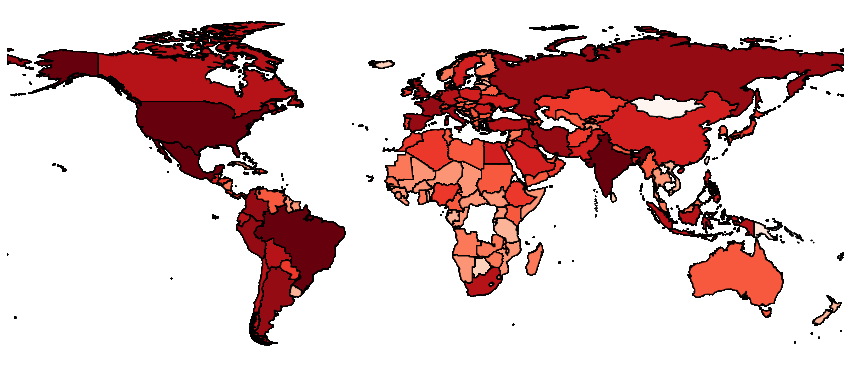

In [48]:
#Q8
#Create a choropleth map 
#Geoplot
gp = geoplot.choropleth(
    world_merge_2, hue = 'TD_new', scheme = None,
    cmap='Reds', figsize=(15, 15)
)

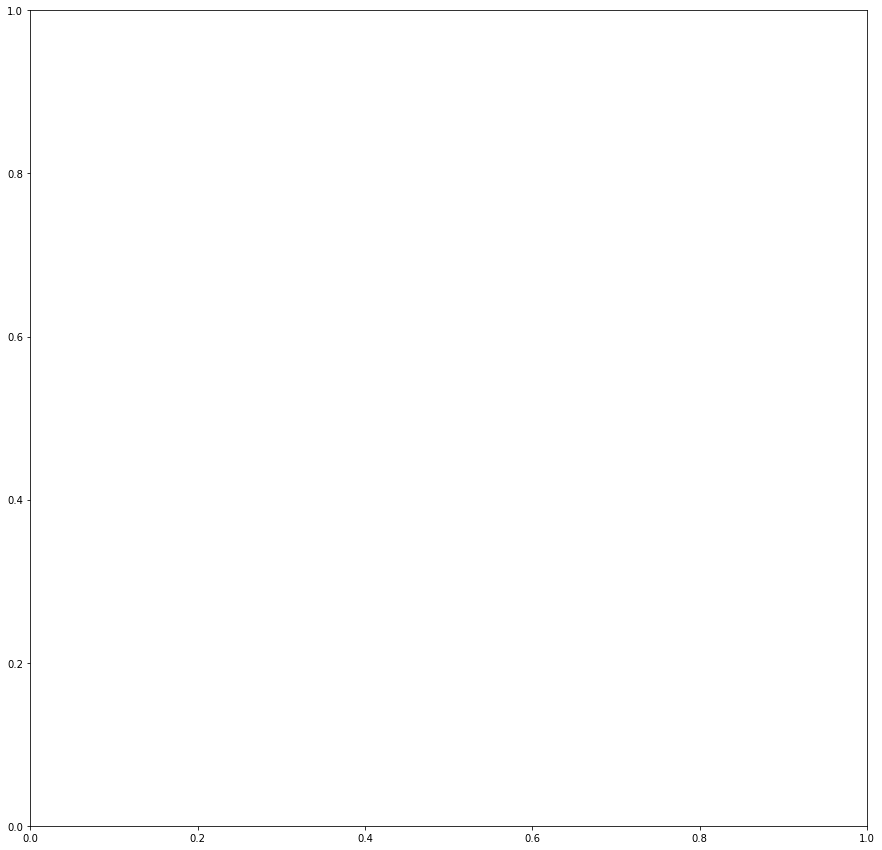

In [49]:
# Create a subplot with `fig` and `ax`.
fig, ax = plt.subplots(1, figsize=(15, 15))

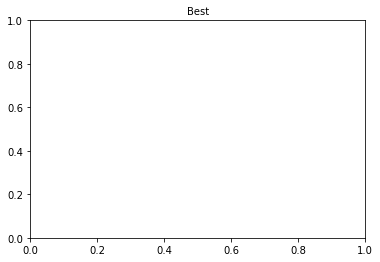

In [50]:
plt.title('Best', size=10)
tl = world_merge_2.plot(column='TD_new',
cmap='Reds',      # Color map for the states                     
             linewidth=0.6,      # Line width for state borders
             ax=ax,              # Plotting the map on `ax`
             edgecolor='black'); # State border colo

In [51]:
c_bar_colors = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=world_merge_2['TD_new'].min(), vmax=world_merge_2['TD_new'].max()))

# Plot the colorbar.
color_bar = fig.colorbar(c_bar_colors)

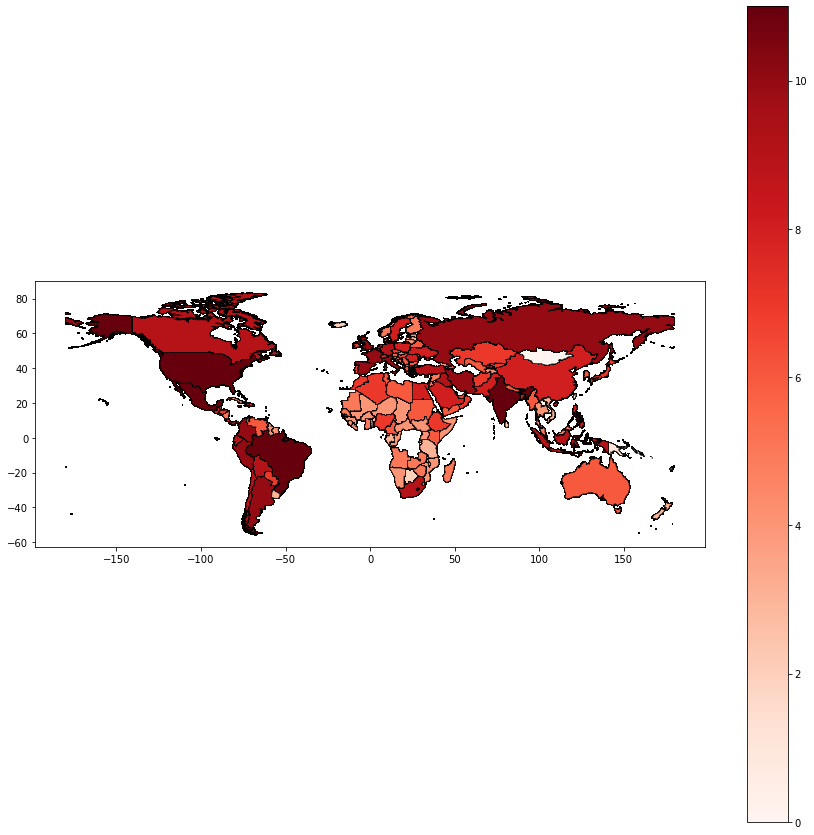

In [52]:
tl.figure

In [53]:
df.to_csv(os.path.join(path, '6 Covid Economies', 'world_merge_2.csv'))